# Elementy programowania - Python
## Wykład 7

---

* Macierze

# Macierze

---

* Język python sam w sobie nie obsługuje działania na macierzach dlatego korzystamy ze specjalnej biblioteki numpy, której zadaniem jest przygotowanie pythona do operacji na "macierzach".

* Pakiet numpy jest używany w większości analiz numerycznych w Pythonie. To pakiet zawierający wydajne środowisko do pracy nawektorach, macierzach i strukturach wielowymiarowych. Biblioteka została zaimplementowana w języku C oraz Fortranie co sprzyja szybkości działania algorytmów.

## Po co mi macierze przecież są typy sekwencyjne ?

- Lista w Pythonie jest bardzo ogólna
    * może zawierać obiekty dowolnego typu, 
    * sa dynamicznie typowane
- Listy nie posiadają metod matematycznych i algebraicznych
---
- Macierze są jednolite
- Macierze są efektywne (szczególnie na pamięci i operacji numerycznych)
- Implementacja operacji w C i Fortranie przyspiesza pracę

## Co gdyby macierzy nie było ?

In [2]:
import numpy as np

In [7]:
sizeL = 1000000
L = range(sizeL)
Lnp = np.arange(sizeL)

257 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


1.18 ms ± 6.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Tworzenie macierzy

Istnieje kilka opcji na tworzenie/inicjalizowanie macierzy

In [7]:
x1d = np.array([0,1,2,3]) #1D
x2d = np.array([[0,1,2],[0,1,2]]) #2Db

In [8]:
type(x1d), type(x2d)

(numpy.ndarray, numpy.ndarray)

In [9]:
x1d.shape, x2d.shape # Wektor 1D a Macierz 2D

((4,), (2, 3))

In [10]:
x1d.size, x2d.size

(4, 6)

In [11]:
x1d.ndim, x2d.ndim

(1, 2)

## List czy Tuple ?

In [12]:
x = np.array([[1,2,3],[4,5,6]])
print(x)
x = np.array(((1,2,3),(4,5,6)))
print(x)

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]


## Funkcje tworzące macierze

In [13]:
# arange(start,end,step)

In [14]:
# linspace(start,end,number of points)

In [15]:
# ones, zeros, eye, diag, empty

## Losowe

In [16]:
print(np.random.rand(4)) # [0,1]
print(np.random.randn(4)) # Gaussian

[0.25102166 0.69276206 0.53834314 0.72027055]
[ 0.76537135 -0.46983549 -0.12506385 -0.02537359]


(array([   9.,  117.,  628., 1748., 2891., 2588., 1491.,  447.,   73.,
           8.]),
 array([-3.75263347, -2.98426807, -2.21590267, -1.44753727, -0.67917187,
         0.08919353,  0.85755893,  1.62592433,  2.39428973,  3.16265513,
         3.93102053]),
 <a list of 10 Patch objects>)

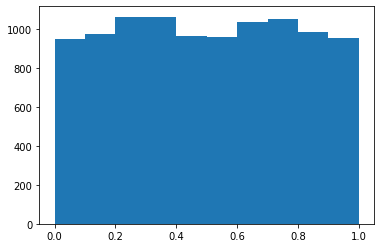

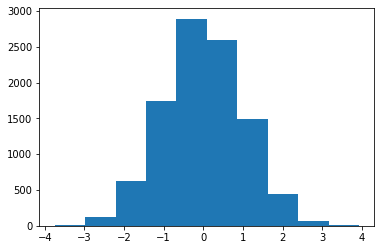

In [10]:
d1 = np.random.rand(10000)
d2 = np.random.randn(10000)
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(d1, figure = plt.figure())
plt.hist(d2, figure = plt.figure())

In [17]:
# Stwórz macierz z 10 liczbami losowymi od 0 do 66
print(np.random.rand(10)*66)

[63.37342638 49.27292759  8.2364452  60.07604335 41.34151822 54.26891872
 42.25640924 44.41877996 12.84692661 26.36236616]


## Typy danych wewnątrz macierzy

In [19]:
print(np.array([1,2,3]).dtype)
print(np.array([1.1,2.,3]).dtype)

int32
float64


In [20]:
print(np.array([1,2,3], dtype=float).dtype)

float64


In [21]:
print(np.ones(5).dtype) # Domyślny typ danych

float64


In [22]:
print(np.array([True, False, False, True]).dtype)

bool


In [23]:
# Czy w macierzy możemy przechowywać tekst ? jaki typ wewnętrzny danych uzyskamy ?

In [24]:
# co gdy wprowadzimy różne typy ?

## Indeksy i przycinanie
* Indexing and slicing (indeksowanie i krajanie na plastry(Google translate)/ziomki na plastry/plasterkowanie)

Indeksowanie i przynacie macierzy odbywa się w ten sam sposób co w przypadku prostych typów sekwencyjnych

In [25]:
a = np.arange(10)
print(a)
print(a[0])
print(a[::-1]) # odwrotnie
print(a[2:6:2]) # od 2 do 6 ze skokiem 2

[0 1 2 3 4 5 6 7 8 9]
0
[9 8 7 6 5 4 3 2 1 0]
[2 4]


In [26]:
np.set_printoptions(precision=2)

a=np.random.rand(3,3)
print(a)
print(a[(1,1)]) # trzy sposoby
print(a[1]) # sam wiersz
print(a[:,0]) # sama kolumna

[[0.57 0.75 0.99]
 [0.66 0.64 0.79]
 [0.28 0.35 0.51]]
0.6352724806024918
[0.66 0.64 0.79]
[0.57 0.66 0.28]


![fig](http://scipy-lectures.org/_images/numpy_indexing.png)

## Kopie i widoki

Operacja wycinania (slicing) tworzy widok macierzy a nie nową macierz

In [146]:
a = np.ones((10,10))

print('Macierz a',a)
print('---')

b = a[1:4:2,:] # Wycinek macierzy tworzy wyłącznie widok tej macierzy, a nie nową macierz

print('Wycinek b',b)
print('---')
b[:]=12

# Dzieje się tak tylko w przypadku widoku

Macierz a [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
---
Wycinek b [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
---


In [147]:
print('Wycinek b zmodyfikowany',b)
print('---')
print('Macierz A',a)
print('---')

Wycinek b zmodyfikowany [[12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
 [12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]]
---
Macierz A [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
---


In [30]:
a = np.ones((10,10))

b = a[1:4:2,:].copy() # jeżeli nie chce tworzyć odniesienia do macierzy źródłowej używamy metody copy

print(b)
print('---')
b[:]=12

print(b)
print('---')
print(a)
print('---')

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
---
[[12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
 [12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]]
---
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
---


## Zmyślne indexowanie (fancy indexing)

In [34]:
a = np.random.randint(0, 21, 15)
print(a)
print('---')
mask = (a%3 == 0)
print(mask)
print('---')
extract_from_a = a[mask] # albo bezpośrednio a[a%3==0]
print(extract_from_a) # Zamiast indexu użylismy maski zawierającej wartości True/False

[11 14  2  9 13 14  3  0  3 19 12 11  1  4  3]
---
[False False False  True False False  True  True  True False  True False
 False False  True]
---
[ 9  3  0  3 12  3]


In [38]:
a = np.random.randint(0, 21, 15)
print(a)zz
a[a>10]=-1
print(a)

[ 5 15 14  1 14  6 11 14  5  3  9  3  8  7  4]
[ 5 -1 -1  1 -1  6 -1 -1  5  3  9  3  8  7  4]


## Zmyślne indexowanie (fancy indexing)

Możemy również podać zbiór "współrzędnych" elementów macierzy które chcemy wyciągnąć

![fig2](http://scipy-lectures.org/_images/numpy_fancy_indexing.png)

## Operacje na macierzach

In [41]:
a = np.array([1,2,3,4.0])
print(a)

[ 1.  2.  3.  4.]


In [40]:
print(a+2) #suma
print(a**2) #kwadrat

[ 3.  4.  5.  6.]
[  1.   4.   9.  16.]


In [31]:
a = np.array([1,2,3,4.0])
b = np.array([0.1,0.4,1,5])

np.add(a,b,out=a) # parametr out
print(a)
np.negative(a,out=a)
print(a)
# add, subtract, divide, negative, multiply

[1.1 2.4 4.  9. ]
[-1.1 -2.4 -4.  -9. ]


In [49]:
a = np.ones((2,3)) #dtype
b = np.random.random((2,3))
print(a)
print(b)

[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 0.71  0.86  0.83]
 [ 0.5   0.22  0.91]]


In [50]:
b+=a
print(b)

[[ 1.71  1.86  1.83]
 [ 1.5   1.22  1.91]]


In [47]:
a+=b
print(a)

[[ 1.73  1.71  1.56]
 [ 1.41  1.4   1.05]]


### Array multiplication in not matrix multiplication

In [51]:
a*b

array([[ 1.71,  1.86,  1.83],
       [ 1.5 ,  1.22,  1.91]])

In [53]:
a.dot(b.T)

array([[ 5.4 ,  4.63],
       [ 5.4 ,  4.63]])

## Funkcje

In [55]:
a = np.arange(5)
print(a)
print(np.sin(a))
print(np.log(a))
print(np.exp(a))
print(np.abs(a))
print(np.arctan2(a,a[::-1]))

[0 1 2 3 4]
[ 0.    0.84  0.91  0.14 -0.76]
[ -inf  0.    0.69  1.1   1.39]
[  1.     2.72   7.39  20.09  54.6 ]
[0 1 2 3 4]
[ 0.    0.32  0.79  1.25  1.57]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


## Transpozycja, odwrotność, wyznacznik

In [32]:
a=np.random.randint(0,10,(3,3))
b = a.transpose()
b = a.T # to samo |
print(a)
print(b)

[[4 5 5]
 [4 2 6]
 [0 9 3]]
[[4 4 0]
 [5 2 9]
 [5 6 3]]


In [ ]:
## Czy transpozycja to osobny obiekt ?

In [36]:
print(np.linalg.inv(a))
print(np.linalg.det(a))

[[ 0.33 -0.21 -0.14]
 [ 0.08 -0.08  0.03]
 [-0.25  0.25  0.08]]
-575.9999999999997


In [37]:
print(np.unique(a))

[ 0  4  6  8 10 12 18]


In [38]:
x = np.array([[1,1],[2,2]])
print(x)

[[1 1]
 [2 2]]


In [41]:
#Funkcje mogą być wykorzystywane jako metody obiektu 'array' lub funkcje pakiety numpy
print() # sum
print() # min
print() # mean
print() # std
print() # median
print() # cumsum

## Parametr 'axis'

In [44]:
help(np.sum)

Help on function sum in module numpy:

sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        integer.  In that case, if `a` 

![fig3](http://scipy-lectures.org/_images/reductions.png)

In [45]:
x

array([[1, 1],
       [2, 2]])

In [46]:
x.sum(axis=1)

array([2, 4])

## Find index of the value

In [47]:
x.argmin()

0

In [48]:
idx = np.argwhere(x>1)

In [49]:
print(idx)

[[1 0]
 [1 1]]


## Manipulacja rozmiarem macierzy

In [55]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [60]:
print(a, a.shape, a.size)

b = a.ravel() #spłaszczenie

[[1 2 3]
 [4 5 6]] (2, 3) 6
[1 2 3 4 5 6] (2, 3) 6


In [62]:
print(b, b.shape, b.size)

[1 2 3 4 5 6] (6,) 6


In [64]:
print(b.reshape((2,3)))

[[1 2 3]
 [4 5 6]]


In [67]:
a = np.arange(100)
a.shape = (5,20)
print(a)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]


In [69]:
a = np.arange(100).reshape(10,-1) # on wie sam
print(a)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


## Łączenie macierzy

In [70]:
a = np.array([[1, 2], [3, 4]])

In [75]:
b = np.repeat(a,3)

array([[1, 2],
       [3, 4]])

In [79]:
a

array([[1, 2],
       [3, 4]])

In [76]:
b

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [77]:
np.shape(a), np.shape(b)

((2, 2), (12,))

In [82]:
np.tile(a,3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [83]:
b = np.array([[5, 6]])

In [100]:
# concatenate
# hstack i vstack

In [84]:
a,b

(array([[1, 2],
        [3, 4]]), array([[5, 6]]))

In [88]:
a.shape,b.shape

((2, 2), (1, 2))

In [86]:
np.concatenate((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [93]:
np.concatenate((b.T,a),axis=1)

array([[5, 1, 2],
       [6, 3, 4]])

In [97]:
c = np.arange(2)
c, c.shape

(array([0, 1]), (2,))

In [98]:
np.concatenate((a,c))

ValueError: all the input arrays must have same number of dimensions

In [99]:
np.concatenate((a,c.reshape(1,-1)))

array([[1, 2],
       [3, 4],
       [0, 1]])

In [103]:
print(a,b)
np.hstack((a,b.T))

[[1 2]
 [3 4]] [[5 6]]


array([[1, 2, 5],
       [3, 4, 6]])

In [104]:
print(a,b)
np.vstack((a,b))

[[1 2]
 [3 4]] [[5 6]]


array([[1, 2],
       [3, 4],
       [5, 6]])

## Wczytywanie danych z pliku

---

* np.loadtxt() # Szybkie i ubogie w funkcje
* np.genfromtxt() # Wolniejsze za to pozwala na więcej

### Przykład - wpasowanie funkcji liniowej w zbiór punktów metodą najmniejszych kwadratów
---

In [112]:
import numpy as np

data = np.loadtxt('dane_wyklad7.txt')

print(data)

size_data = len(data)

A = np.hstack((np.ones([size_data,1]),data[:,0].reshape(-1,1)))     

l = data[:,1]

print(A.shape)
print(l.shape)

x = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,l))

print(x)

[[0.  0. ]
 [1.  1. ]
 [2.  2. ]
 [3.  3. ]
 [4.  4. ]
 [2.3 1.1]
 [1.2 3.5]
 [3.1 0.2]]
(8, 2)
(8,)
[0.69 0.56]


In [138]:
import numpy as np

data = np.loadtxt('eop.txt',skiprows=15)

size_data = len(data)

A = np.hstack((np.ones([size_data,1]),data[:,3].reshape(-1,1)))     

l = data[:,5]

print(A.shape)
print(l.shape)

x = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,l))

print(x)

(21484, 2)
(21484,)
[-1.10e-01  8.41e-06]


In [139]:
import matplotlib.pyplot as plt

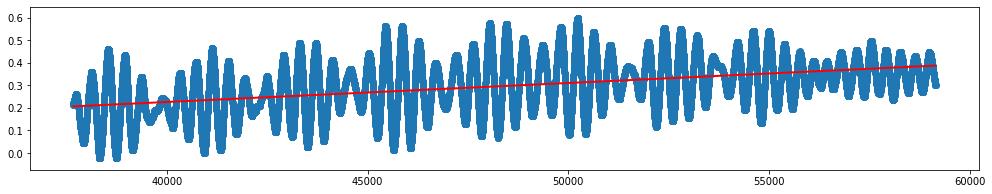

In [144]:
f,a = plt.subplots(1,1, figsize=(17,3))
a.scatter(data[:,3],data[:,5])
a.plot(data[:,3],x[1]*data[:,3]+x[0],color='red',linewidth=2)